Link to the dataset: https://github.com/waico/SKAB/tree/master/data/valve1

Dataset: 0.csv

## Description of use case

The dataset represents a multivariate time series collected from the sensors installed on the testbed. It can be used to test different anomaly detection algorithms.

## Dataset statistics

Total number of samples: 1148

Duration of time: 2020-03-09 10:14:33 to 2020-03-09 10:34:32

Nomber of anomalies:401



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/Administrator/Downloads/SKAB-master/SKAB-master/data/valve1/0.csv",index_col='datetime',sep=';',parse_dates=True)

### duration and total samples

In [7]:
df.head()

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
datetime,,,,,,,,,,
2020-03-09 10:14:33,0.026588,0.040111,1.33020,0.054711,79.3366,26.0199,233.062,32.0,0.0,0.0
2020-03-09 10:14:34,0.026170,0.040452,1.35399,0.382638,79.5158,26.0258,236.040,32.0,0.0,0.0
2020-03-09 10:14:35,0.026199,0.039419,1.54006,0.710565,79.3756,26.0265,251.380,32.0,0.0,0.0
2020-03-09 10:14:36,0.026027,0.039641,1.33458,0.382638,79.6097,26.0393,234.392,32.0,0.0,0.0
2020-03-09 10:14:37,0.026290,0.040273,1.07851,-0.273216,79.6109,26.0420,225.342,32.0,0.0,0.0


In [8]:
df.index

DatetimeIndex(['2020-03-09 10:14:33', '2020-03-09 10:14:34',
               '2020-03-09 10:14:35', '2020-03-09 10:14:36',
               '2020-03-09 10:14:37', '2020-03-09 10:14:38',
               '2020-03-09 10:14:39', '2020-03-09 10:14:40',
               '2020-03-09 10:14:41', '2020-03-09 10:14:42',
               ...
               '2020-03-09 10:34:23', '2020-03-09 10:34:24',
               '2020-03-09 10:34:25', '2020-03-09 10:34:26',
               '2020-03-09 10:34:27', '2020-03-09 10:34:28',
               '2020-03-09 10:34:29', '2020-03-09 10:34:30',
               '2020-03-09 10:34:31', '2020-03-09 10:34:32'],
              dtype='datetime64[ns]', name='datetime', length=1148, freq=None)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1148 entries, 2020-03-09 10:14:33 to 2020-03-09 10:34:32
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Accelerometer1RMS    1148 non-null   float64
 1   Accelerometer2RMS    1148 non-null   float64
 2   Current              1148 non-null   float64
 3   Pressure             1148 non-null   float64
 4   Temperature          1148 non-null   float64
 5   Thermocouple         1148 non-null   float64
 6   Voltage              1148 non-null   float64
 7   Volume Flow RateRMS  1148 non-null   float64
 8   anomaly              1148 non-null   float64
 9   changepoint          1148 non-null   float64
dtypes: float64(10)
memory usage: 98.7 KB


## Count anomalies

<AxesSubplot:>

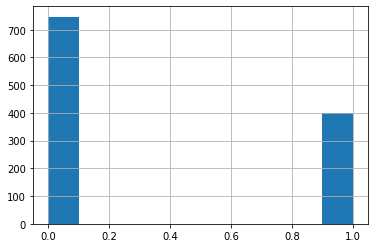

In [10]:
df.anomaly.hist()

In [18]:
df.anomaly.value_counts()

0.0    747
1.0    401
Name: anomaly, dtype: int64

## Visualisation

In [29]:
features=list(df.columns)
features.pop(-1)
features.pop(-1)
features

['Accelerometer1RMS',
 'Accelerometer2RMS',
 'Current',
 'Pressure',
 'Temperature',
 'Thermocouple',
 'Voltage',
 'Volume Flow RateRMS']

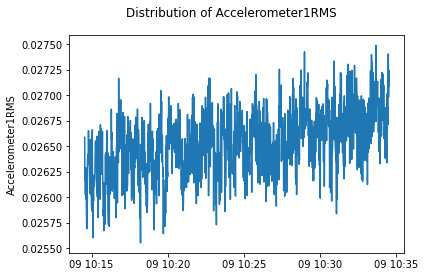

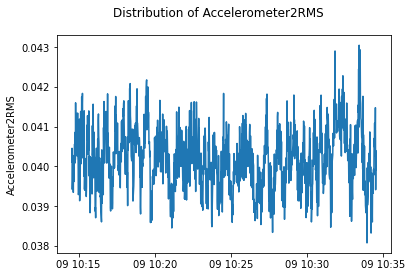

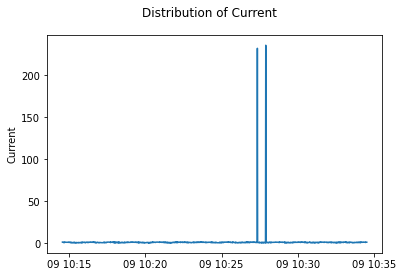

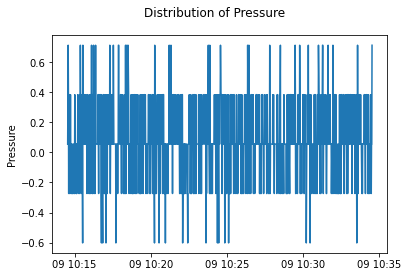

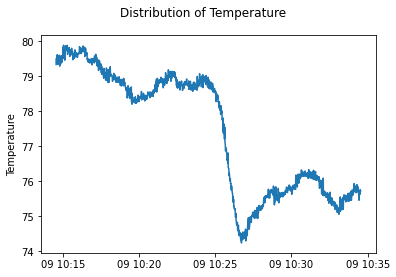

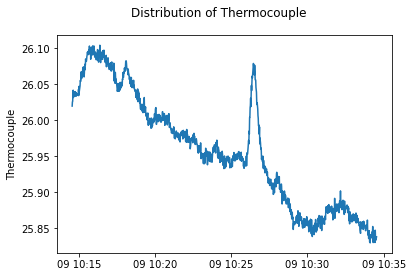

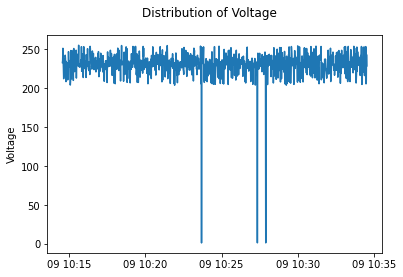

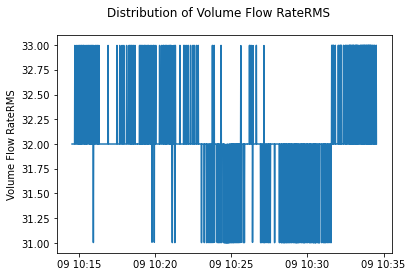

In [30]:
for col in features:
    plt.plot(df[col])
    plt.ylabel(col)
    plt.suptitle('Distribution of '+col)
    plt.show()

## Example of anomaly

In the graph of current, there are two very differnt values between 09 10:25 to 09 10:35, by checking the anomaly value of the row of one of them (here I take the max value), it shows that it is a anomaly (with anomaly = 1.0).

In [14]:
max(df.Current)

235.511

In [15]:
df[df['Current'] == 235.511].index

DatetimeIndex(['2020-03-09 10:27:54'], dtype='datetime64[ns]', name='datetime', freq=None)

In [17]:
df.loc['2020-03-09 10:27:54']

Accelerometer1RMS        0.026690
Accelerometer2RMS        0.039510
Current                235.511000
Pressure                 0.054711
Temperature             75.199500
Thermocouple            25.908500
Voltage                  1.161970
Volume Flow RateRMS     32.000000
anomaly                  1.000000
changepoint              0.000000
Name: 2020-03-09 10:27:54, dtype: float64